In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
plt.rcParams["figure.figsize"] = [12, 8]

In [7]:
df = pd.read_csv(r"C:\Users\macie\Downloads\archive\202004-divvy-tripdata.csv")

In [8]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id        int64
end_station_name       object
end_station_id        float64
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

<AxesSubplot:>

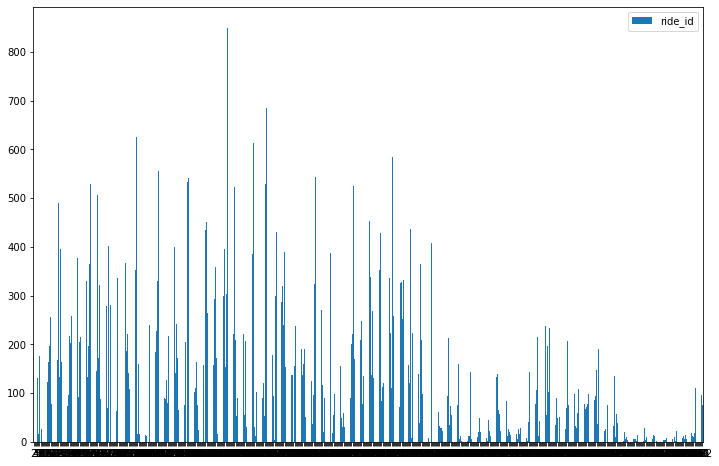

In [9]:
gs = df.groupby("start_station_id").agg("ride_id").count()
gs.sort_values(ascending=False)
gs

x = np.arange(2,603)
dd = pd.DataFrame(gs, index=x)
ax = dd.plot.bar(rot=0)
ax


In [10]:
df.groupby(["start_station_name","end_station_name"]).agg("ride_id").count().sort_values(ascending=False)

start_station_name            end_station_name              
Stockton Dr & Wrightwood Ave  Stockton Dr & Wrightwood Ave      119
Indiana Ave & Roosevelt Rd    Indiana Ave & Roosevelt Rd        113
Clark St & Elm St             Clark St & Elm St                 111
Larrabee St & Webster Ave     Larrabee St & Webster Ave         110
Wabash Ave & Grand Ave        Wabash Ave & Grand Ave            101
                                                               ... 
Millennium Park               State St & Van Buren St             1
                              Throop (Loomis) St & Taylor St      1
Canal St & Monroe St          Kingsbury St & Erie St              1
                              Franklin St & Lake St               1
Damen Ave & Chicago Ave       California Ave & Altgeld St         1
Name: ride_id, Length: 28050, dtype: int64

In [11]:
zmiana_stacji = df.loc[df.start_station_id != df.end_station_id]
zmiana_stacji.groupby(["start_station_name","end_station_name"]).agg("ride_id").count().sort_values(ascending=False).head(10)

start_station_name            end_station_name             
MLK Jr Dr & 29th St           State St & 33rd St               64
State St & 33rd St            MLK Jr Dr & 29th St              46
St. Clair St & Erie St        Clinton St & Washington Blvd     45
Clinton St & Washington Blvd  St. Clair St & Erie St           43
Streeter Dr & Grand Ave       Fairbanks St & Superior St       42
Aberdeen St & Jackson Blvd    Loomis St & Lexington St         38
Columbus Dr & Randolph St     Dearborn St & Monroe St          38
Kingsbury St & Erie St        Dearborn St & Erie St            38
Larrabee St & Oak St          Clark St & Elm St                37
Halsted St & Willow St        Pine Grove Ave & Waveland Ave    36
Name: ride_id, dtype: int64

In [12]:
zmiana_stacji.groupby(["start_station_name"]).agg("ride_id").count().sort_values(ascending=False).head(10)

start_station_name
Clark St & Elm St            739
Desplaines St & Kinzie St    655
Dearborn St & Erie St        629
St. Clair St & Erie St       620
Clark St & Armitage Ave      552
Broadway & Barry Ave         530
Wabash Ave & Grand Ave       513
Clark St & Lincoln Ave       497
Clark St & Schiller St       491
Columbus Dr & Randolph St    481
Name: ride_id, dtype: int64

In [13]:
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])


In [14]:
df['time_spent'] = df['ended_at'] - df['started_at']
df = df.loc[df["time_spent"] < '1 days']
df = df.loc[df["time_spent"] > '0 days']
timebiking = df['ended_at'] - df['started_at']


In [15]:
timebiking.head()

0   0 days 00:26:49
1   0 days 00:08:09
2   0 days 00:14:23
3   0 days 00:12:12
4   0 days 00:52:55
dtype: timedelta64[ns]

In [16]:
timebiking.sort_values(ascending=False)

45232   0 days 23:58:33
20880   0 days 23:56:39
62897   0 days 23:55:10
58084   0 days 23:38:58
68148   0 days 23:34:32
              ...      
11425   0 days 00:00:02
70245   0 days 00:00:02
63395   0 days 00:00:02
36281   0 days 00:00:01
16560   0 days 00:00:01
Length: 84594, dtype: timedelta64[ns]

In [17]:
timebiking.mean()

Timedelta('0 days 00:23:59.091176679')

In [18]:
timebiking = timebiking.loc[timebiking < '1 days']
timebiking = timebiking.loc[timebiking > '0 days']

In [19]:
timebiking.sort_values(ascending=False)

45232   0 days 23:58:33
20880   0 days 23:56:39
62897   0 days 23:55:10
58084   0 days 23:38:58
68148   0 days 23:34:32
              ...      
11425   0 days 00:00:02
70245   0 days 00:00:02
63395   0 days 00:00:02
36281   0 days 00:00:01
16560   0 days 00:00:01
Length: 84594, dtype: timedelta64[ns]

In [20]:
timebiking.mean()

Timedelta('0 days 00:23:59.091176679')

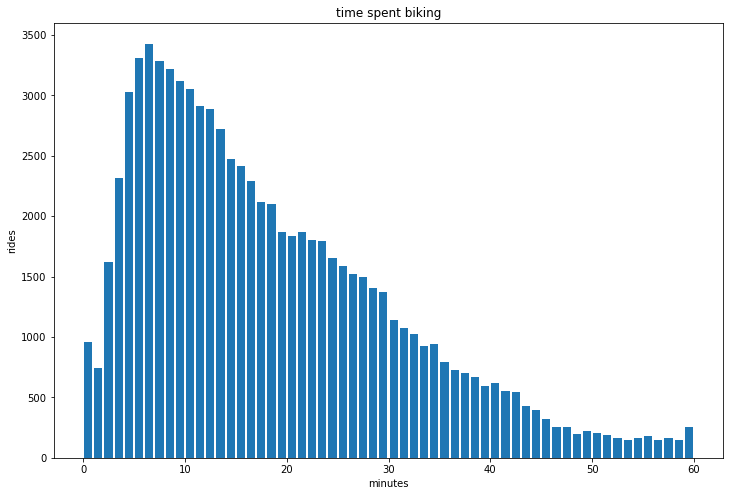

In [21]:
fig = (timebiking.astype('timedelta64[m]')).plot.hist(bins = 60, range = (0,60), rwidth = 0.8)
fig.set_title("time spent biking")
fig.set_xlabel("minutes")
fig.set_ylabel("rides")
fig.set_adjustable('box', share=False)


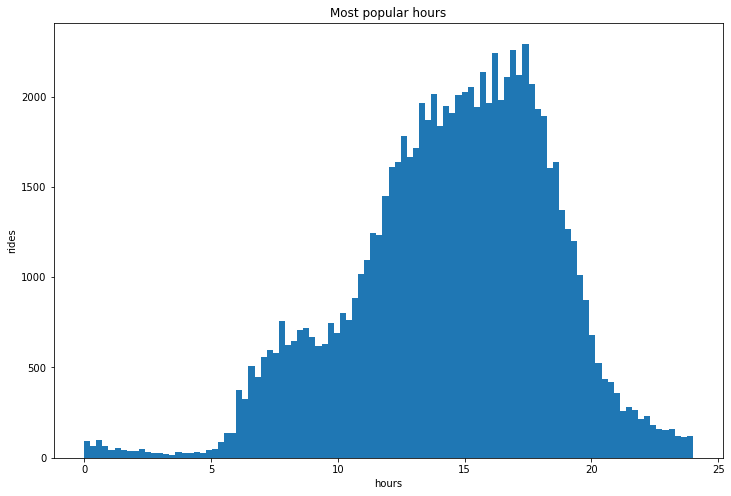

In [22]:
fig = (df['started_at'].dt.hour +df['started_at'].dt.minute/60).plot.hist(bins = 100, range = (0,24))
fig.set_title("Most popular hours")
fig.set_xlabel("hours")
fig.set_ylabel("rides")
fig.set_adjustable('box', share=False)

In [23]:
a = df.groupby("start_station_name").agg('time_spent').sum().sort_values(ascending=False)
b = df.groupby("start_station_name").agg('time_spent').count().sort_values(ascending=False)
a = pd.merge(a,b, on="start_station_name")
a["mean"] = a["time_spent_x"] / a["time_spent_y"]
a = a.loc[a["time_spent_y"]>100]
a.sort_values(["mean"], ascending=False)


,time_spent_x,time_spent_y,mean
start_station_name,,,
Chicago Ave & Dempster St,3 days 09:45:17,109,0 days 00:45:00.155963302
Sheridan Rd & Greenleaf Ave,2 days 22:41:45,108,0 days 00:39:16.527777777
State St & Kinzie St,6 days 04:16:45,229,0 days 00:38:51.026200873
Leavitt St & North Ave,4 days 07:27:29,161,0 days 00:38:33.347826086
Benson Ave & Church St,2 days 21:18:01,110,0 days 00:37:48.009090909
...,...,...,...
Clinton St & Jackson Blvd,1 days 03:48:36,119,0 days 00:14:01.310924369
Fairbanks St & Superior St,2 days 07:43:26,241,0 days 00:13:52.390041493
900 W Harrison St,1 days 05:26:18,129,0 days 00:13:41.534883720


In [24]:
df["weekday"] = df["started_at"].dt.dayofweek
weekdf = df.groupby("weekday").agg("ride_id").count()
weekdf

weekday
0    10723
1    12783
2     8698
3    11683
4     9950
5    12881
6    17876
Name: ride_id, dtype: int64

<BarContainer object of 7 artists>

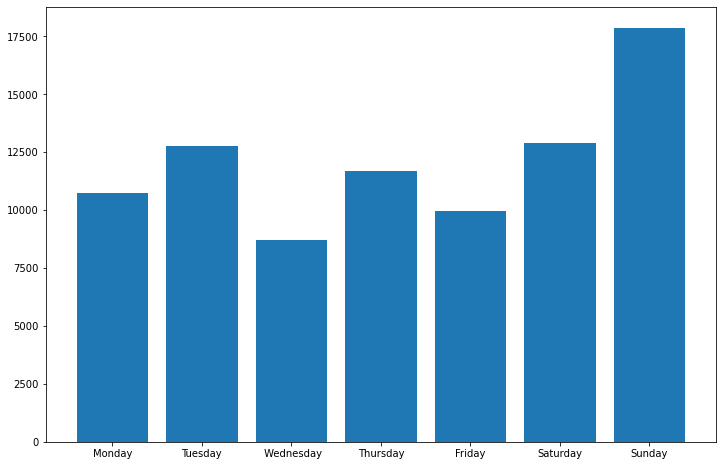

In [25]:
x = ['Monday', 'Tuesday', ' Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday' ]
plt.figure()
plt.rcParams["figure.figsize"] = [10, 6]
plt.bar(x,weekdf)